# Distribution Example B - Asymptotics of H

In [182]:
import DistBTrunc as dbt

from math import log
from matplotlib import pyplot as plot
from scipy.fft import ifft, fft
from scipy.interpolate import interp1d

from LocUtil import Grid1, LogGrid1, MinMax
from LocMath import Bisect

In [4]:
import importlib as il
il.reload(dbt)

<module 'DistBTrunc' from 'F:\\Users\\Kenne.DESKTOP-BT6VROU\\Documents\\GitHub\\ManetSim\\CdfFit\\Note Books\\DistBTrunc.py'>

In [152]:
eps = 1e-4
nPlot = 101

In [153]:
zMin,zMax = (dbt.CdfZTrunc(eps / 4))
zMin,zMax

(-3.2728505855186225, 4.456407818445269)

Text(0, 0.5, 'Residual')

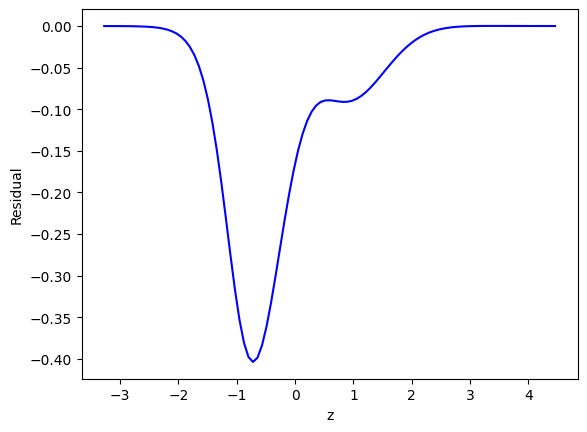

In [154]:
zGrid = Grid1(zMin,zMax, nPlot)
resGrid = [dbt.ResZ(z) for z in zGrid]

plot.plot(zGrid,resGrid, c='blue')

plot.xlabel('z')
plot.ylabel('Residual')

## Compute Fourier Transform

In [155]:
nSamp = 8 * 1_024
mid = nSamp // 2
mid

4096

In [156]:
zGrid = Grid1(zMin,zMax, nSamp)
resSamp = [dbt.ResZ(z) for z in zGrid]

In [157]:
resTrans = fft(resSamp)

Text(0, 0.5, 'FFT Index')

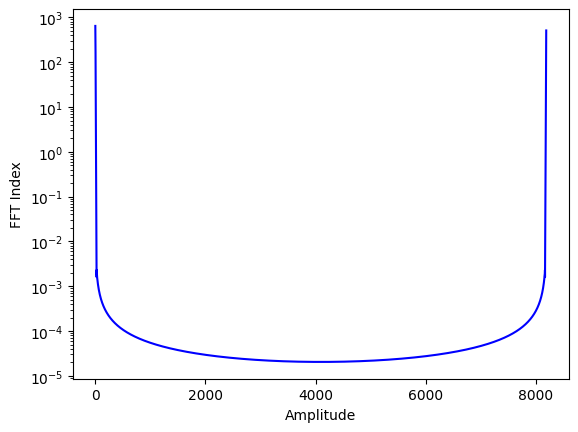

In [158]:
absTrans = [abs(t) for t in resTrans]
plot.semilogy(absTrans, c='blue')

plot.xlabel('Amplitude')
plot.ylabel('FFT Index')

# look at positive frequencies only.
Negative frequencies are just the complex conjugate of the positive frequencies

In [159]:
posFreq = tuple(resTrans[i] for i in range(mid))

In [160]:
deltaZ = (zMax - zMin) / nSamp
deltaZ

0.0009435129887651235

In [161]:
fMax = 1 / (2*deltaZ)
fMax

529.9344110295752

In [162]:
deltaF = 1 / deltaZ / nSamp
deltaF

0.1293785183177674

TODO:  Double check that this is 1/(2h) and not 2/h

Text(0, 0.5, 'Amplitude of Positive Frequency')

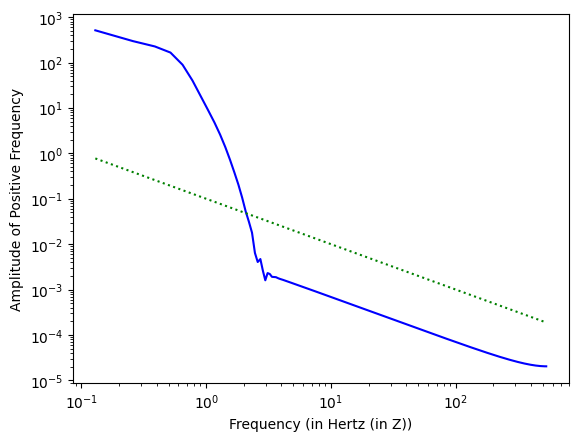

In [163]:
freq = tuple(k * deltaF for k in range(1,mid))
amp = tuple(abs(posFreq[i]) for i in range(1,mid))
plot.loglog(freq,amp, c='blue')

line = tuple(100e-3 / f for f in freq)
plot.loglog(freq,line, ':', c='green')

plot.xlabel('Frequency (in Hertz (in Z))')
plot.ylabel('Amplitude of Positive Frequency')

The fact that the constant is close to 0.1 is dumb luck.  Could do a proper fit, but at the 
moment am not really using this result anywhere.

In [164]:
sum(resSamp), resTrans[0]

(-646.1659434507736, (-646.1659434507735-0j))

Wow!  This FFT is properly scaled.

In [165]:
transScale = tuple(abs(posFreq[i]) / nSamp for i in range(1,mid))

Text(0, 0.5, 'Scaled FFT')

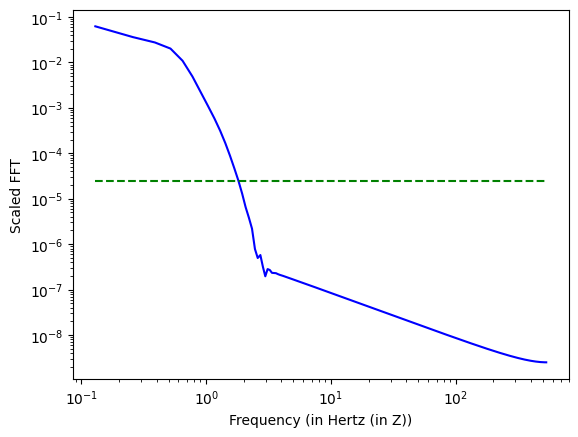

In [166]:
plot.loglog(freq,transScale, c='blue')

plot.loglog((freq[0], freq[mid - 2]), (eps/4,eps/4), '--', c='green')

plot.xlabel('Frequency (in Hertz (in Z))')
plot.ylabel('Scaled FFT')

In [167]:
h = tuple(1 / (2*f) for f in freq)

Text(0, 0.5, 'Fraction of Energy')

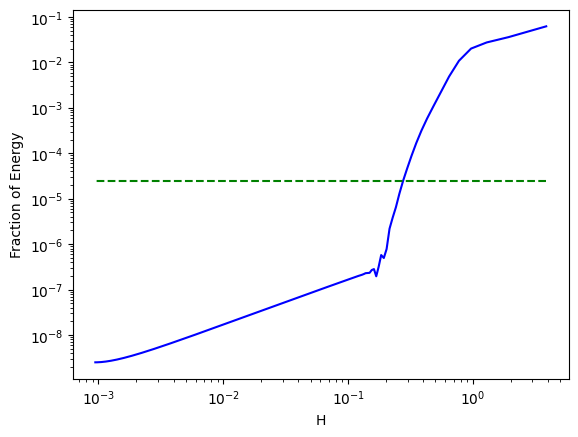

In [168]:
plot.loglog(h,transScale, c='blue')

plot.loglog((h[0], h[mid - 2]), (eps/4,eps/4), '--', c='green')

plot.xlabel('H')
plot.ylabel('Fraction of Energy')

Text(0, 0.5, 'Fraction of Energy')

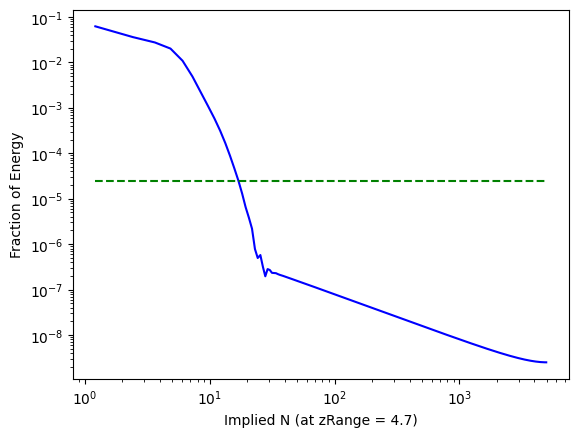

In [169]:
implyedN = tuple(zRange * 2*f for f in freq)

plot.loglog(implyedN,transScale, c='blue')
plot.loglog((implyedN[0], implyedN[mid - 2]), (eps/4,eps/4), '--', c='green')

plot.xlabel(f'Implied N (at zRange = {zRange:.2})')
plot.ylabel('Fraction of Energy')

## N as a Function of Error

In [211]:
freqInterp = interp1d(freq, transScale)

In [212]:
fRange = MinMax(freq)
fRange

[0.1293785183177674, 529.8050325112574]

In [213]:
def Param(eps):
	zMin,zMax = (dbt.CdfZTrunc(eps / 4))
	zRange = zMax - zMin
	
	fLim = Bisect(freqInterp, eps/4, fRange)
	h = 1 / (2*fLim)
	
	impliedN = zRange / h
	
	return (impliedN, zRange, h)

Text(0, 0.5, 'Implied N')

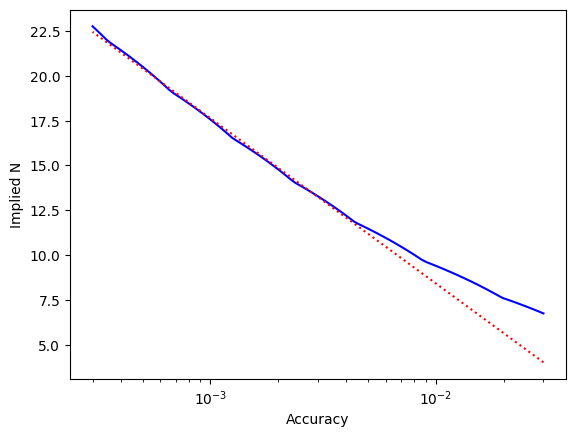

In [214]:
epsL = LogGrid1(3e-2, 3e-4, nPlot)
nL = tuple(Param(e)[0] for e in epsL)

plot.semilogx(epsL,nL, c='blue')

modelN = [-4*log(e) - 10 for e in epsL]
plot.semilogx(epsL, modelN, ':', c='red')

plot.xlabel('Accuracy')
plot.ylabel('Implied N')